In [1]:
#import libraries
import os
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import json,os
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

import fuzzywuzzy
from fuzzywuzzy import process
import chardet
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings('ignore')
import re
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 

# graph viz
import plotly.offline as pyo

from plotly.graph_objs import *
import plotly.graph_objs as go

#map section
import imageio
import folium
import folium.plugins as plugins

root = os.getcwd()

/home/ai001/anaconda3/envs/ML4016/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
df = pd.read_csv (root + '/../yelp/processed.csv')

#### Sentiment Analysis

In [3]:
#all words
words = df['text'].str.lower().str.cat(sep=' ')
words = re.sub('[^A-Za-z]+', ' ', words)

words[0:1000]

'delete out at this dave and busters was a little different than the ones i ve been to before but that doesn t make it better or worse the bartenders are very very friendly but i see from other reviews where time is an issue everything moves very slow until its closing time area my ball got stuck in a game and i couldn t find someone to help for the last minutes the place was open in of course at on the dock everything shuts down registers games whatever so if you have an issue it s gone we ate dinner in got power card which was a pretty good deal we enjoyed the dishes very much only issue with dinner was the salmon little bit salty i had the salmon grilled and subbed the rice for garlic mashed potatoes which tasted homemade and my bf had the steak and shrimp pasta which was also pretty tasty he says he wishes then they would have salmon and shrimp on the pasta instead of the steak it really was that good you tried the corona with the margarita and said it was a little weak but at leas

In [4]:
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

In [5]:
word_tokens = word_tokenize(words)

In [6]:
filtered_words = []
for i in word_tokens:
    if i not in stop_words:
        filtered_words.append(i)
        
filtered_words[90:100]

['drinks',
 'discount',
 'happy',
 'hour',
 'likely',
 'go',
 'back',
 'returning',
 'home',
 'amazing']

In [7]:
# Remove words with length<=2  
length_words = [i for i in filtered_words if len(i) > 2]

length_words[90:100]

['discount',
 'happy',
 'hour',
 'likely',
 'back',
 'returning',
 'home',
 'amazing',
 'time',
 'food']

In [8]:
# Remove numbers
num_words = [i for i in length_words if not i.isnumeric()]

Text(0.5, 1.0, 'The frequency of top 7 words')

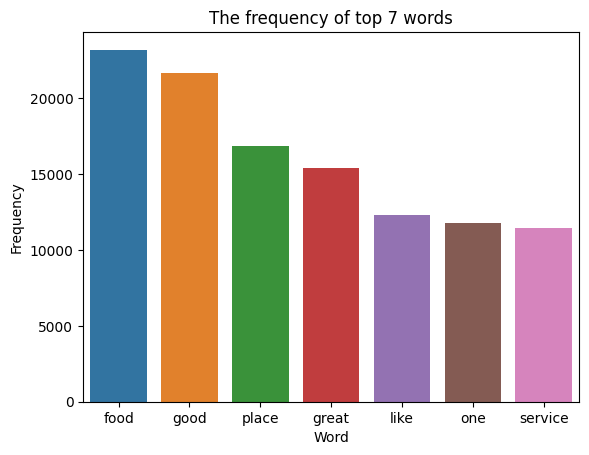

In [9]:
top_N = 100
word_dist = nltk.FreqDist(num_words)
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])


ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))
plt.title('The frequency of top 7 words')

In [10]:
def wc(data,bgcolor,title):
    #plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

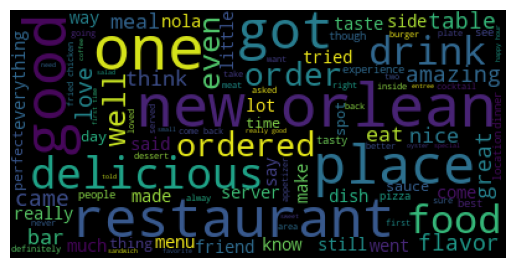

In [11]:
wc(num_words,'black','Most Used Words')

In [12]:
def check(word, list): 
    if word in list: print("The word is in the list") 
    else: print("The word is not in the list")
        
check('or', num_words)
check('like', num_words)

The word is not in the list
The word is in the list


In [13]:
bloblist = list()
df['text']=df['text'].astype(str)
df_review_str=df[['text','user_id']]

In [14]:
df_review_str

,text,user_id
0,Delete out at this Dave and busters was a litt...,ARFM4LrI_zxogm1L29ZKng
1,I had an amazing time at Mr. Ed's and the food...,ARFM4LrI_zxogm1L29ZKng
2,Took forever to get drinks. Were told there wa...,qQLZBmmnAvi9N7_Bymc6hA
3,Been here twice first and last time. It takes ...,qQLZBmmnAvi9N7_Bymc6hA
4,Tried to give this place one more try. It is s...,qQLZBmmnAvi9N7_Bymc6hA
...,...,...
31621,"Saw this spot on Yelp, we were tired and hungr...",eGqr3lwwonUATMeKp7QpHg
31622,Holy sh*t. My favorite baker who opened and ra...,y6SzYr7xpMmpobNmWaTZTQ
31623,Writing this review in hopes of alerting the p...,0qlZ8SHk2WrzG5dg_D9fBA
31624,Oh. My. God!!!!! This place is absolutely amaz...,blEtNROhkgPbawqTNlL5Qg


In [15]:
user_id = []
for row in range(len(df_review_str)):
    blob = TextBlob(df_review_str.iloc[row]['text'])
    bloblist.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    user_id.append(df_review_str.iloc[row]['user_id'])
df2= pd.DataFrame(bloblist, columns = ['Review','sentiment','polarity'])
df2['userid'] = user_id

In [16]:
df2

,Review,sentiment,polarity,userid
0,0,0.067178,0.565022,ARFM4LrI_zxogm1L29ZKng
1,1,0.440625,0.728241,ARFM4LrI_zxogm1L29ZKng
2,2,0.068182,0.727273,qQLZBmmnAvi9N7_Bymc6hA
3,3,0.216263,0.332727,qQLZBmmnAvi9N7_Bymc6hA
4,4,-0.196825,0.527778,qQLZBmmnAvi9N7_Bymc6hA
...,...,...,...,...
31621,31621,-0.000325,0.586688,eGqr3lwwonUATMeKp7QpHg
31622,31622,0.318750,0.493750,y6SzYr7xpMmpobNmWaTZTQ
31623,31623,-0.006771,0.552778,0qlZ8SHk2WrzG5dg_D9fBA
31624,31624,0.393750,0.706250,blEtNROhkgPbawqTNlL5Qg


In [17]:
len(user_id)

31626

In [18]:
df2.head()

,Review,sentiment,polarity,userid
0,0,0.067178,0.565022,ARFM4LrI_zxogm1L29ZKng
1,1,0.440625,0.728241,ARFM4LrI_zxogm1L29ZKng
2,2,0.068182,0.727273,qQLZBmmnAvi9N7_Bymc6hA
3,3,0.216263,0.332727,qQLZBmmnAvi9N7_Bymc6hA
4,4,-0.196825,0.527778,qQLZBmmnAvi9N7_Bymc6hA


<AxesSubplot:ylabel='Density'>

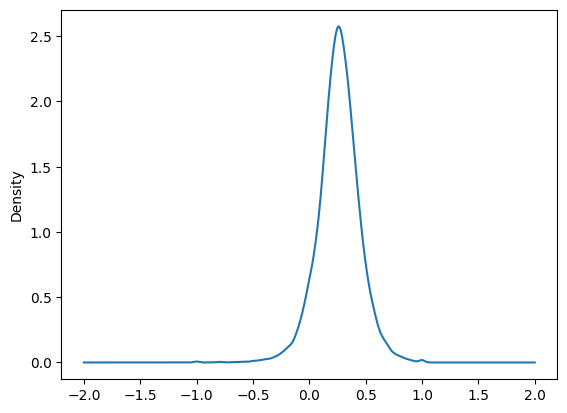

In [19]:
df2.sentiment.plot(kind='density')

In [20]:
df2['sentiment'].median()

0.2629464285714286

In [21]:
def f(df2):
    if df2['sentiment'] > 0.263:
        result = "1"
    elif df2['sentiment'] == 0.263:
        result = "2"
    else:
        result = "0"
    return result

In [22]:
df2['Sentiment_Type'] =df2.apply(f,axis=1)

Text(0.5, 1.0, 'Result of sentiment analysis')

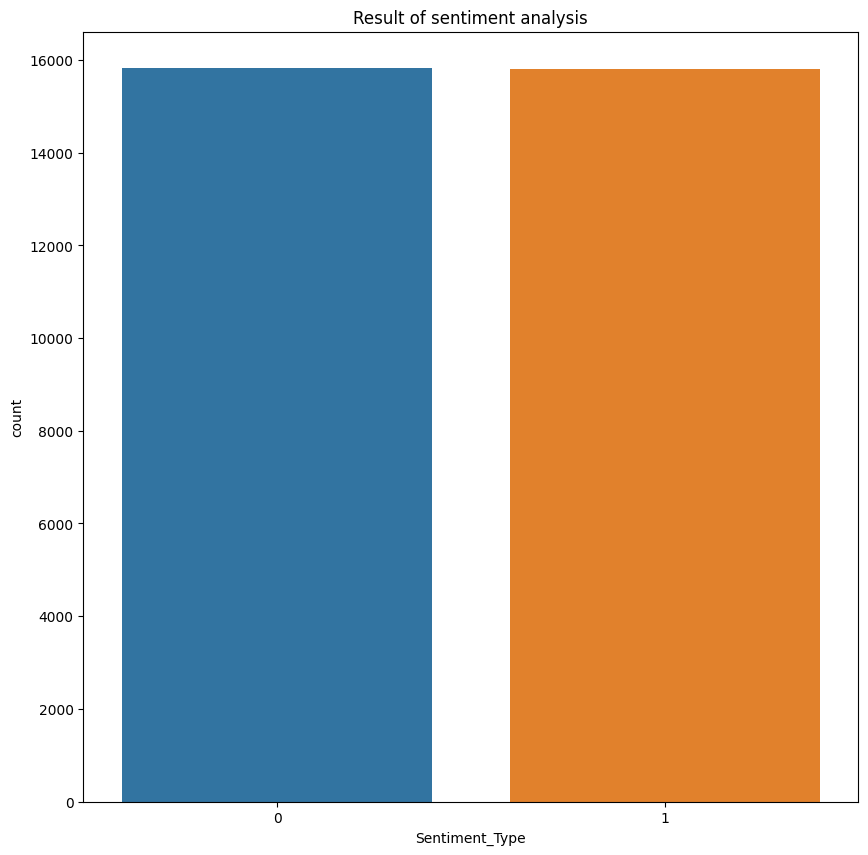

In [23]:
plt.figure(figsize=(10,10))
#sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df2)
plt.title('Result of sentiment analysis')

In [25]:
df2 = df2[['Sentiment_Type', 'Review','userid']]

In [26]:
df2.to_csv('sentiment_map.csv', index = False)

In [ ]:
df2.shape

In [ ]:
31626/2

In [ ]:
15813*0.8

In [ ]:
12650 + 15813

In [ ]:
unlabel = df2.iloc[:15813]
label = df2.iloc[15813:28463]
test = df2.iloc[28463:]

In [ ]:
with open('Train_nolabel.txt', 'w') as f:
    for i in range(unlabel.shape[0]):
        f.write(' '.join(unlabel.Review.iloc[i].split()) + '\n')
f.close()

with open('Train_label.txt', 'w') as f:
    for i in range(label.shape[0]):
        f.write(str(label.Sentiment_Type.iloc[i]) + ' +++$+++ ' + ' '.join(label.Review.iloc[i].split()) + '\n')
f.close()

with open('Test.txt', 'w') as f:
    f.write('id,text'+'\n')
    for i in range(test.shape[0]):
        f.write(str(test.Sentiment_Type.iloc[i]) + ',' + ' '.join(test.Review.iloc[i].split()) + '\n')
f.close()

In [ ]:
unlabel.shape, label.shape, test.shape